In [1]:
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler


# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
import pydotplus                                     # interprets dot objects

from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer   

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = './datasets/Apprentice_Chef_Dataset.xlsx'

AppChef = pd.read_excel(io=file)

AppChef.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205


In [2]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')

    
#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [3]:
# engineering email

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in AppChef.iterrows():
    
    # splitting email domain at '@'
    split_email = AppChef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df

# renaming column to concatenate
email_df.columns = ['0' , 'personal_email_domain']


# concatenating personal_email_domain with friends DataFrame
AppChef = pd.concat([AppChef, email_df['personal_email_domain']],
                     axis = 1)

# email domain types
personal_mail = ['gmail.com', 'protonmail.com','yahoo.com','msn.com','aol.com','passport.com','hotmail',
                'live.com','me.com']
professional_mail  = ['amex.com','merck.com','mcdonalds.com','jnj.com','cocacola.com','nike.com',
                      'apple.com','ibm.com','dupont.com','ge.org','microsoft.com','chevron.com',
                      'travelers.com','exxon.com','unitedhealth.com','boeing.com','caterpillar.com',
                      'verizon.com','mmm.com','pg.com','disney.com','walmart.com','visa.com','pfizer.com',
                      'jpmorgan.com','goldmansacs.com','cisco.com','unitedtech.com','intel.com','homedepot.com']


# placeholder list
placeholder_lst = []


# looping to group observations by domain type, personal, professional, junk
for domain in AppChef['personal_email_domain']:
    
    if domain in personal_mail:
        placeholder_lst.append('personal')
        

    elif domain in professional_mail:
        placeholder_lst.append('professional')


    else:
        placeholder_lst.append('Junk')

AppChef = pd.concat([AppChef, pd.Series(placeholder_lst)],
                     axis = 1)


# one hot encoding categorical variables
one_hot_mail       = pd.get_dummies(AppChef[0])
# dropping categorical variables after they've been encoded
AppChef = AppChef.drop(0, axis = 1)


# joining codings together
AppChef = AppChef.join([one_hot_mail])

In [4]:
# engineering Weekly plan
week_lst = []


# looping to group observations by plan or not plan
for day in AppChef['WEEKLY_PLAN']:
    
    if day ==0:
        week_lst.append('no_plan')
        

    else:
        week_lst.append('plan')
        
week_df = pd.DataFrame(week_lst)


week_df.columns = ['PLAN']


AppChef=pd.concat([AppChef, week_df],
                     axis = 1)


# one hot encoding categorical variables
one_hot_week      = pd.get_dummies(AppChef['PLAN'])
# dropping categorical variables after they've been encoded
AppChef = AppChef.drop('PLAN', axis = 1)


# joining codings together
AppChef = AppChef.join([one_hot_week])

In [5]:
# engineering mobile
mobile_lst = []


# looping to group observations by mobile or landline
for phone in AppChef['MOBILE_NUMBER']:
    
    if phone ==0:
        mobile_lst.append('landline')
        

    else:
        mobile_lst.append('mobile')

        
        
mobile_df = pd.DataFrame(mobile_lst)


mobile_df.columns = ['PHONE']


AppChef=pd.concat([AppChef, mobile_df],
                     axis = 1)


# one hot encoding categorical variables
one_hot_mobile     = pd.get_dummies(AppChef['PHONE'])
# dropping categorical variables after they've been encoded
AppChef = AppChef.drop('PHONE', axis = 1)


# joining codings together
AppChef = AppChef.join([one_hot_mobile])

In [6]:
# engineering meals

# we will make a categorization according to the total meals ordered
# from 11 (minimum accordinwith the data base) to 156 --> basic
# from 157 to 331 -->normal
# from 332 to 493 --> pro

meals_lst = []


# looping to group observations by domain type, personal, professional, junk
for meals in AppChef['TOTAL_MEALS_ORDERED']:
    
    if meals <157:
        meals_lst.append('basic')
    else:
        meals_lst.append('normal')

meals_df = pd.DataFrame(meals_lst)


meals_df.columns = ['MEALS_P']


AppChef=pd.concat([AppChef, meals_df],
                     axis = 1)

# one hot encoding categorical variables
one_hot_meals     = pd.get_dummies(AppChef['MEALS_P'])

# dropping categorical variables after they've been encoded
AppChef = AppChef.drop('MEALS_P', axis = 1)


# joining codings together
AppChef = AppChef.join([one_hot_meals])

In [7]:
# calling text_split_feature
text_split_feature(col = 'NAME',
                   df  = AppChef)



In [8]:
df_corr = AppChef.corr(method='pearson').round(decimals=2)

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

CROSS_SELL_SUCCESS             1.00
professional                   0.19
number_of_names                0.16
CANCELLATIONS_BEFORE_NOON      0.16
mobile                         0.10
MOBILE_NUMBER                  0.10
TASTES_AND_PREFERENCES         0.08
REFRIGERATED_LOCKER            0.07
MASTER_CLASSES_ATTENDED        0.04
CONTACTS_W_CUSTOMER_SERVICE    0.04
PC_LOGINS                      0.04
PACKAGE_LOCKER                 0.04
MEDIAN_MEAL_RATING             0.03
AVG_PREP_VID_TIME              0.03
no_plan                        0.02
LARGEST_ORDER_SIZE             0.02
basic                          0.02
EARLY_DELIVERIES               0.02
TOTAL_PHOTOS_VIEWED            0.01
LATE_DELIVERIES                0.01
TOTAL_MEALS_ORDERED            0.01
AVG_TIME_PER_SITE_VISIT        0.01
UNIQUE_MEALS_PURCH             0.00
PRODUCT_CATEGORIES_VIEWED      0.00
REVENUE                        0.00
WEEKLY_PLAN                   -0.01
plan                          -0.02
normal                      

In [9]:
# declaring explanatory variables
AppChef_data = AppChef.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
AppChef_target = AppChef.loc[ : , 'CROSS_SELL_SUCCESS']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
            AppChef_data,
            AppChef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = AppChef_target)


# merging training data for statsmodels
AppChef_train = pd.concat([x_train, y_train], axis = 1)

In [11]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.68
0    0.32
Name: CROSS_SELL_SUCCESS, dtype: float64



In [12]:
# instantiating a logistic regression model object
# 


logistic_sig_2 = smf.logit(formula = """  CROSS_SELL_SUCCESS ~ MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON + TASTES_AND_PREFERENCES + 
                     Junk + personal +normal+ number_of_names""",
                                         data    = AppChef_train)

# fitting the model object
results_full = logistic_sig_2.fit()


# checking the results SUMMARY
results_full.summary()

Optimization terminated successfully.
         Current function value: 0.568617
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1459
Model:                          Logit   Df Residuals:                     1451
Method:                           MLE   Df Model:                            7
Date:                Tue, 26 Jan 2021   Pseudo R-squ.:                 0.09450
Time:                        19:50:28   Log-Likelihood:                -829.61
converged:                       True   LL-Null:                       -916.19
Covariance Type:            nonrobust   LLR p-value:                 5.408e-34
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.7561      0.261     -2.898      0.004      -1.267      -0.245
MOBILE_NUMBER                 0.7945      0.173      4.602      0.000       0.456       1.133
CANCELLATIONS_BEFORE_NOON     0.2732      0.045      6.077      0.000       0.185       0.361
TASTES_AND_PREFERENCES        0.3744      0.131      2.863      0.004       0.118       0.631
Junk                         -2.1463      0.342     -6.279      0.000      -2.816      -1.476
personal                     -0.9348      0.133     -7.031      0.000      -1.195      -0.674
normal                       -0.1820      0.223     -0.818      0.414      -0.618       0.254
number_of_names               0.4965      0.090      5.532      0.000       0.321       0.672
=============================================================================================
"""

In [13]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['REVENUE','CONTACTS_W_CUSTOMER_SERVICE',' AVG_TIME_PER_SITE_VISIT',
 'MOBILE_NUMBER',' CANCELLATIONS_BEFORE_NOON', ' CANCELLATIONS_AFTER_NOON'
'TASTES_AND_PREFERENCES', ' PC_LOGINS' , 'EARLY_DELIVERIES' ,' LARGEST_ORDER_SIZE' ,
'MASTER_CLASSES_ATTENDED' , 'AVG_CLICKS_PER_VISIT' ,' Junk','personal' ,'plan'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['REVENUE','CANCELLATIONS_BEFORE_NOON','CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 
 'PC_LOGINS', 'EARLY_DELIVERIES' , 'REFRIGERATED_LOCKER' , 'MASTER_CLASSES_ATTENDED' ,
 'MEDIAN_MEAL_RATING' ,  'personal' , 'professional' , 'mobile' ,  'normal' ,  'basic' ],
    
    
 # significant variables only (set 2)
'logit_sig_2'    : ['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 
                     'Junk', 'personal','normal','number_of_names'],
    

    
}




In [14]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}

significant variables
-----------
{candidate_dict['logit_sig_2']}


""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['REVENUE', 'CONTACTS_W_CUSTOMER_SERVICE', ' AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', ' CANCELLATIONS_BEFORE_NOON', ' CANCELLATIONS_AFTER_NOONTASTES_AND_PREFERENCES', ' PC_LOGINS', 'EARLY_DELIVERIES', ' LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'AVG_CLICKS_PER_VISIT', ' Junk', 'personal', 'plan']

significant variables
-----------
['MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'TASTES_AND_PREFERENCES', 'Junk', 'personal', 'normal', 'number_of_names']





In [15]:
# train/test split with the full model
AppChef_data   =  AppChef.loc[ : , candidate_dict['logit_sig_2']]
AppChef_target =  AppChef.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            AppChef_data,
            AppChef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = AppChef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)
# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7272
LogReg Testing  ACCURACY: 0.731
LogReg Train-Test Gap   : 0.0038


In [16]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")




True Negatives : 55
False Positives: 101
False Negatives: 30
True Positives : 301



In [17]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.631


# Classification Tree

In [18]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [19]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.767
Full Tree Testing ACCURACY : 0.7372
Full Tree AUC Score: 0.6677


In [20]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()



# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 74
False Positives: 82
False Negatives: 46
True Positives : 285



In [21]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_split=4,
                                      max_leaf_nodes= 8,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7252
Testing  ACCURACY: 0.7454
AUC Score        : 0.6331


In [22]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 50
False Positives: 106
False Negatives: 18
True Positives : 313



In [23]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('./classification_model_performance.xlsx',
                           index = False)


Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.631         (55, 101, 30, 301)
Full Tree     0.6677         (74, 82, 46, 285)
Pruned Tree   0.6331         (50, 106, 18, 313)



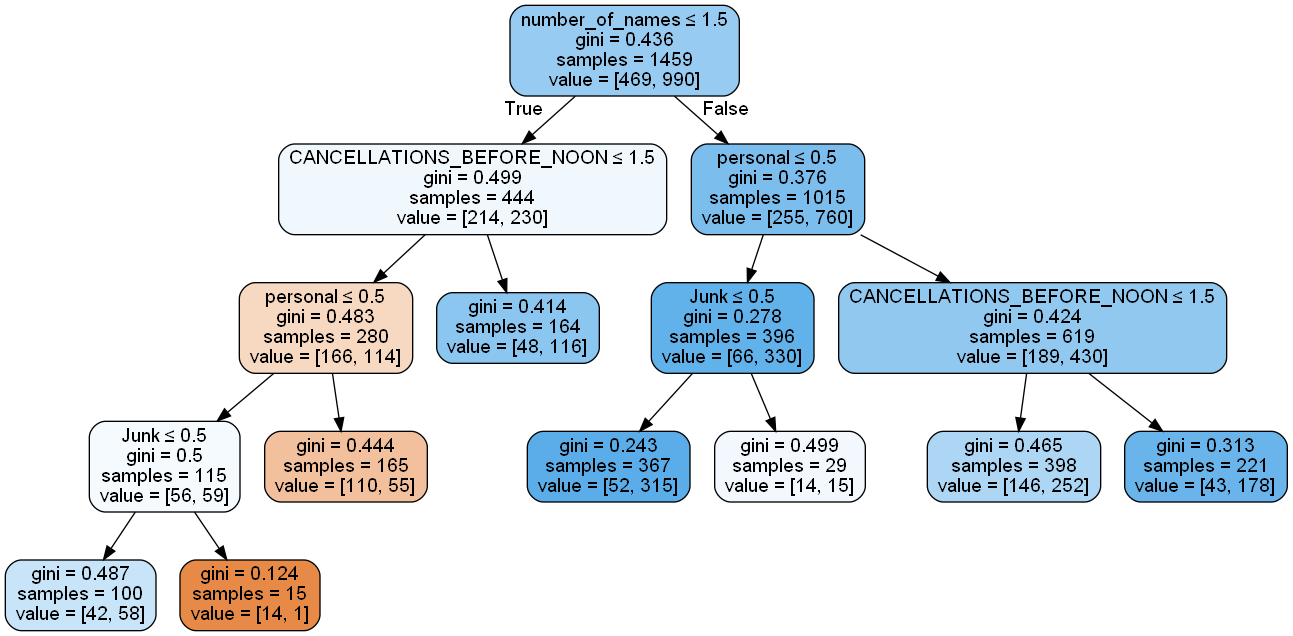

In [24]:
# calling display_tree
display_tree(tree       = pruned_tree_fit,
             feature_df = x_train)

<ipython-input-18-0c71b2e3d4a7>:63: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


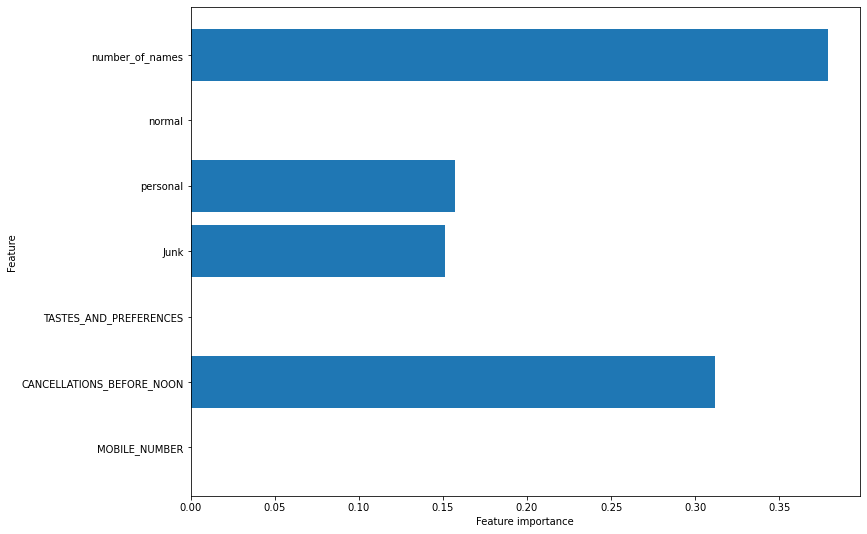

In [25]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train  = x_train,
                         export = False)

# KNN

In [26]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1
  

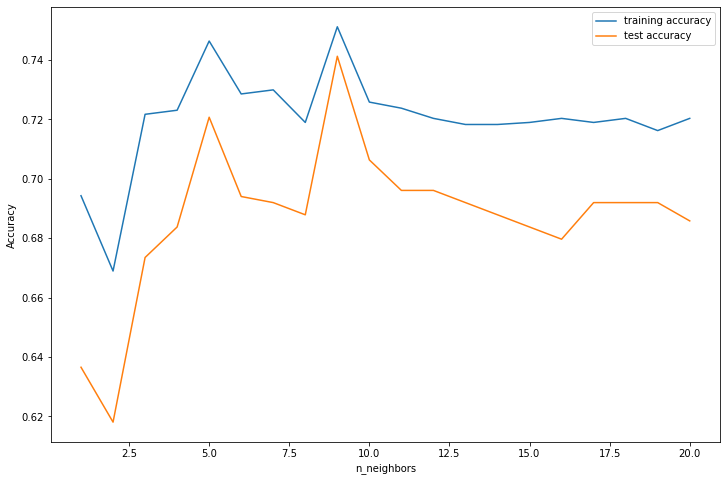

The optimal number of neighbors is: 9


In [27]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = AppChef_data,
                                  y_data        = AppChef_target,
                                  response_type = 'class')

In [28]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(AppChef_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(AppChef_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            AppChef_target,
            random_state = 219,
            test_size = 0.25,
            stratify = AppChef_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.7423
Testing  ACCURACY: 0.7351
AUC Score        : 0.6679


In [29]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 75
False Positives: 81
False Negatives: 48
True Positives : 283



In [30]:
model_performance = model_performance.append(
                          {'Model Name'        : 'KNN',
                           'Training Accuracy' : knn_train_score,
                           'Testing Accuracy'  : knn_test_score,
                           'AUC Score'         : knn_auc_score ,
                           'Confusion Matrix'  : (knn_tree_tn,
                                                  knn_tree_fp,
                                                  knn_tree_fn,
                                                  knn_tree_tp)},
                           ignore_index = True)

# Logistic Regression with Default Hyperparameters

In [31]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

In [32]:
# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.7272
Testing  ACCURACY: 0.731
AUC Score        : 0.631


# Hyperparameter Tuning with RandomizedSearchCV

In [33]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
#C_space          = pd.np.arange(0.1, 5.0, 0.1)
#warm_start_space = [True, False]
#solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
#param_grid = {'C'          : C_space,
#              'warm_start' : warm_start_space,
#              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
#lr_tuned = LogisticRegression(random_state = 219,
#                              max_iter     = 1000)


# GridSearchCV object
#lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
#                                 param_distributions = param_grid, # parameters to tune
#                                 cv                  = 3,          # how many folds in cross-validation
#                                 n_iter              = 250,        # number of combinations of hyperparameters to try
#                                 random_state        = 219,        # starting point for random sequence
#                                 scoring = make_scorer(
#                                           roc_auc_score,
#                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
#lr_tuned_cv.fit(AppChef_data, AppChef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", lr_tuned_cv.best_params_)
#print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

In [34]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned =LogisticRegression(C=3.9000000000000004, max_iter=1000, random_state=219,
                   solver='newton-cg', warm_start=True)
#lr_tuned = lr_tuned_cv.best_estimator_


# FIT step 

lr_tuned_fit=lr_tuned.fit(x_train,y_train)
# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

LR Tuned Training ACCURACY: 0.7272
LR Tuned Testing  ACCURACY: 0.731
LR Tuned AUC Score        : 0.631


In [35]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 55
False Positives: 101
False Negatives: 30
True Positives : 301



In [36]:
# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'LRTuned Tree',
                           'Training Accuracy' : lr_tuned_train_score,
                           'Testing Accuracy'  : lr_tuned_test_score,
                           'AUC Score'         : lr_tuned_auc ,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)

# Hyperparameter Tuning on Classification Trees

In [37]:
# declaring a hyperparameter space
##criterion_space = ['gini']
#splitter_space  = ['best', 'random']
#depth_space     = pd.np.arange(1, 25, 1)
#leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
#param_grid = {'criterion'        : criterion_space,
#              'splitter'         : splitter_space,
#              'max_depth'        : depth_space,
#              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
#tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
#tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
#                                   param_distributions   = param_grid,
#                                   cv                    = 3,
#                                   n_iter                = 1000,
# #                                  random_state          = 219,
# #                                  scoring = make_scorer(roc_auc_score,
#                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#tuned_tree_cv.fit(AppChef_data, AppChef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", tuned_tree_cv.best_params_)
#print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [38]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=219)


# FIT step 
tree_tuned_fit=tree_tuned.fit(x_train,y_train)

# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7395
Testing  ACCURACY: 0.7495
AUC Score        : 0.6649


In [39]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 67
False Positives: 89
False Negatives: 33
True Positives : 298



In [40]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)



In [41]:


########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [42]:
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 400,
                                    criterion        = 'gini',
                                    max_depth        = 8,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [43]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.7601
Testing  ACCURACY: 0.7536
AUC Score        : 0.6764


In [44]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 72
False Positives: 84
False Negatives: 36
True Positives : 295



In [45]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance



,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6310,0.7272,0.7310,"(55, 101, 30, 301)"
1,Full Tree,0.6677,0.7670,0.7372,"(74, 82, 46, 285)"
2,Pruned Tree,0.6331,0.7252,0.7454,"(50, 106, 18, 313)"
3,KNN,0.6679,0.7423,0.7351,"(75, 81, 48, 283)"
4,LRTuned Tree,0.6310,0.7272,0.7310,"(55, 101, 30, 301)"
5,Tuned Tree,0.6649,0.7395,0.7495,"(67, 89, 33, 298)"
6,Random Forest (Full),0.6764,0.7601,0.7536,"(72, 84, 36, 295)"


In [46]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 8,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.767
Testing ACCURACY : 0.7413
AUC Score        : 0.6656


In [47]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 71
False Positives: 85
False Negatives: 41
True Positives : 290



In [48]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)



In [49]:
# declaring a hyperparameter space
#learn_space        = pd.np.arange(0.1, 2.0, 0.2)
#estimator_space    = pd.np.arange(10, 200, 25)
#depth_space        = pd.np.arange(1, 8, 1)
#warm_start_space   = [True, False]

# creating a hyperparameter grid
#param_grid = {'learning_rate' : learn_space,
#              'max_depth'     : depth_space,
#              'n_estimators'  : estimator_space,
#              'warm_start'     : warm_start_space}


# INSTANTIATING the model object without hyperparameters
#full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
#full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
#                           param_distributions = param_grid,
#                           cv                  = 3,
#                           n_iter              = 500,
#                           random_state        = 219,
#                           scoring             = make_scorer(roc_auc_score,
#                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#full_gbm_cv.fit(AppChef_data, AppChef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", full_gbm_cv.best_params_)
#print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

In [50]:
# INSTANTIATING the model object without hyperparameters

# I made several attempts to hyperparameter tuning
gbm_tuned = GradientBoostingClassifier(learning_rate=0.5000000000000001, max_depth=1,
                           n_estimators=110, random_state=219, warm_start=True)

# FIT step is needed as we are not using .best_estimator
gbm_tuned_fit = gbm_tuned.fit(x_train, y_train)


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

Training ACCURACY: 0.7361
Testing  ACCURACY: 0.7577
AUC Score        : 0.6692


In [51]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 66
False Positives: 90
False Negatives: 28
True Positives : 303



In [52]:
# declaring model performance objects
gbm_train_acc = gbm_tuned_fit.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)
# saving the DataFrame to Excel
model_performance.to_excel('./classification_model_performance.xlsx',
                           index = False)

# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6310,0.7272,0.7310,"(55, 101, 30, 301)"
1,Full Tree,0.6677,0.7670,0.7372,"(74, 82, 46, 285)"
2,Pruned Tree,0.6331,0.7252,0.7454,"(50, 106, 18, 313)"
3,KNN,0.6679,0.7423,0.7351,"(75, 81, 48, 283)"
4,LRTuned Tree,0.6310,0.7272,0.7310,"(55, 101, 30, 301)"
5,Tuned Tree,0.6649,0.7395,0.7495,"(67, 89, 33, 298)"
6,Random Forest (Full),0.6764,0.7601,0.7536,"(72, 84, 36, 295)"
7,GBM (Full),0.6656,0.7670,0.7413,"(71, 85, 41, 290)"
8,Tuned GBM,0.6692,0.7361,0.7577,"(66, 90, 28, 303)"


The model with the highest AUC is Random Forest Full